In [1]:
import libs_cleo
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 确保 Matplotlib 图表正确显示在 Jupyter 中
%matplotlib inline

In [2]:
# 加载数据
path_s1 = r"G:\0_postgraduate\DMSP\data\2011\18s1\dms_20110101_18s1.001.nc"
file_s1 = libs_cleo.NcFile(path_s1)
data_s1 = file_s1.original_data
path_ssies3 = r"G:\0_postgraduate\DMSP\data\2011\ssies3\dmsp-f18_ssies-3_thermal-plasma_201101010021_v01.cdf"
file_ssies3 = libs_cleo.CDFFile(path_ssies3)
data_ssies3 = file_ssies3.data
start_time_for_title = file_ssies3.start_time_datetime
vxraw_set_nan = file_ssies3.vxraw_set_nan()

<Axes: >

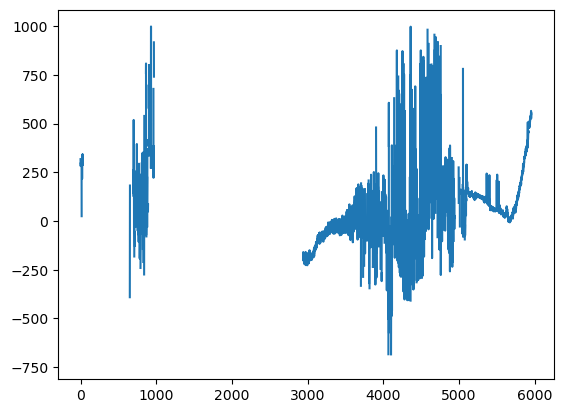

In [3]:
# 填充nan之后vxraw绘图，看看哪些地方是nan
vxraw_set_nan.plot()

In [4]:
# 获取截断索引
start_idx,end_idx = file_ssies3.return_start_end_idx()

In [5]:
# 获取walen测试的所用的data
data = libs_cleo.walen_test_s1_sseis3(data_s1=data_s1,data_ssies3=data_ssies3,start_idx=start_idx,end_idx=end_idx,vxraw_set_nan=vxraw_set_nan)
data['vx'] = data['vx'].interpolate(method='linear')
data['diff_bx'] = data['diff_bx'].interpolate(method='linear')

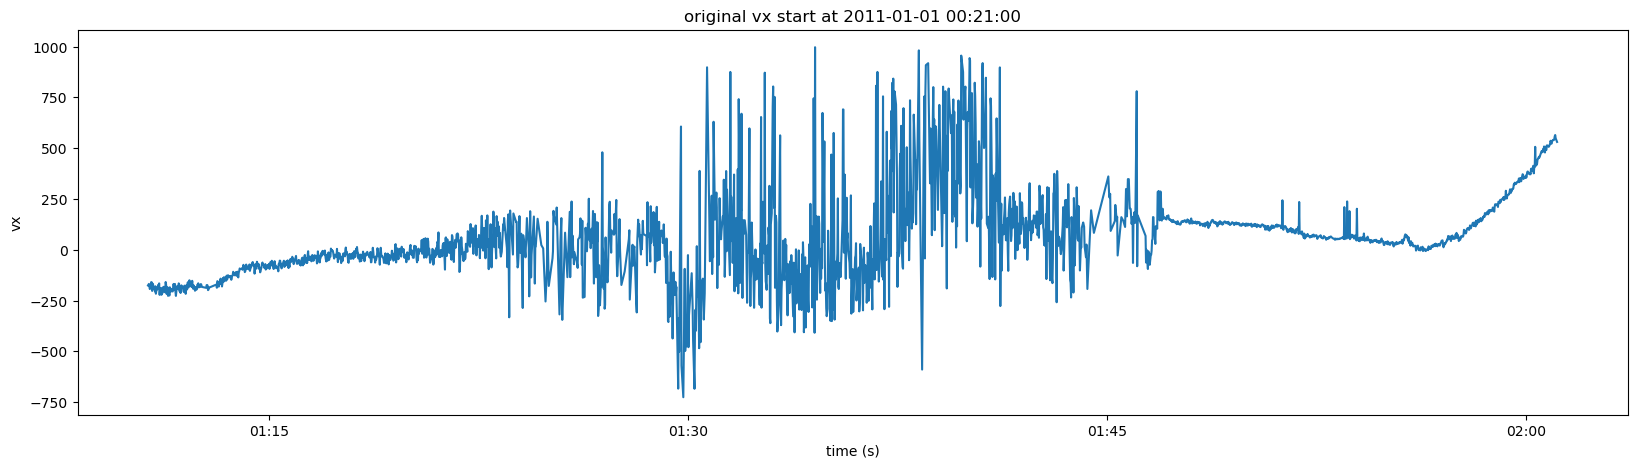

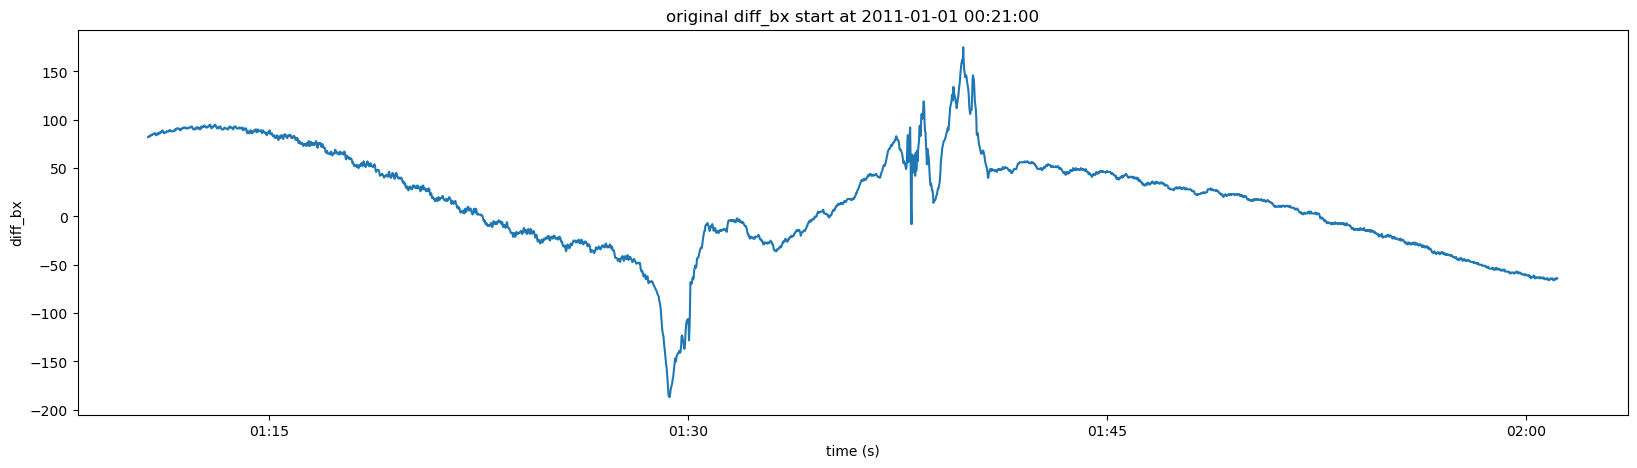

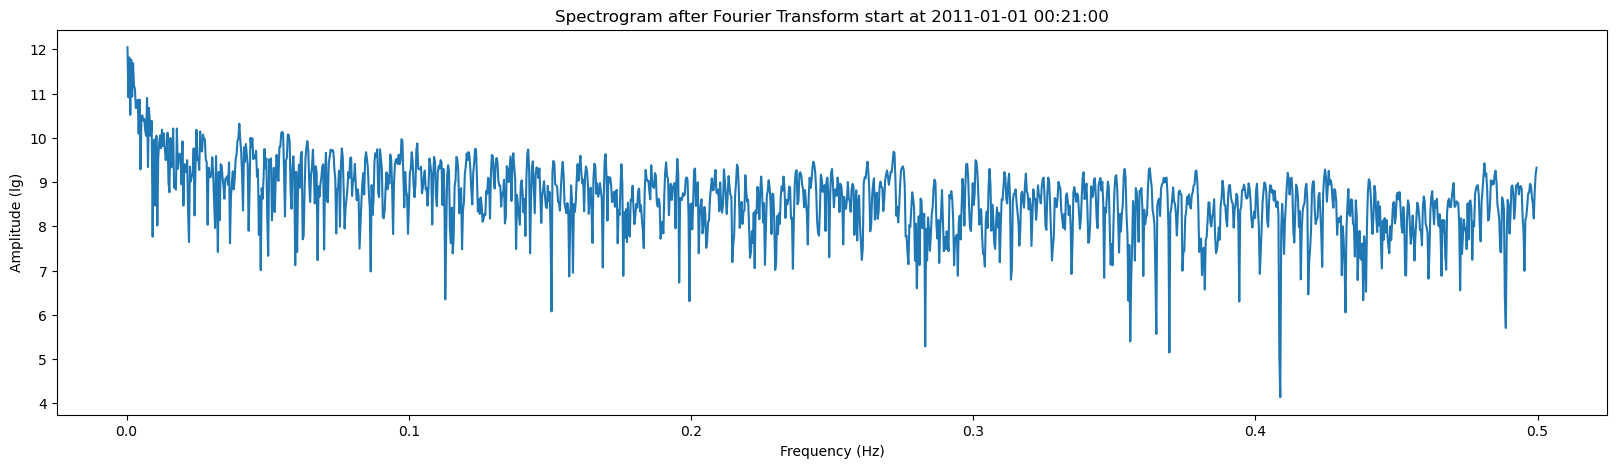

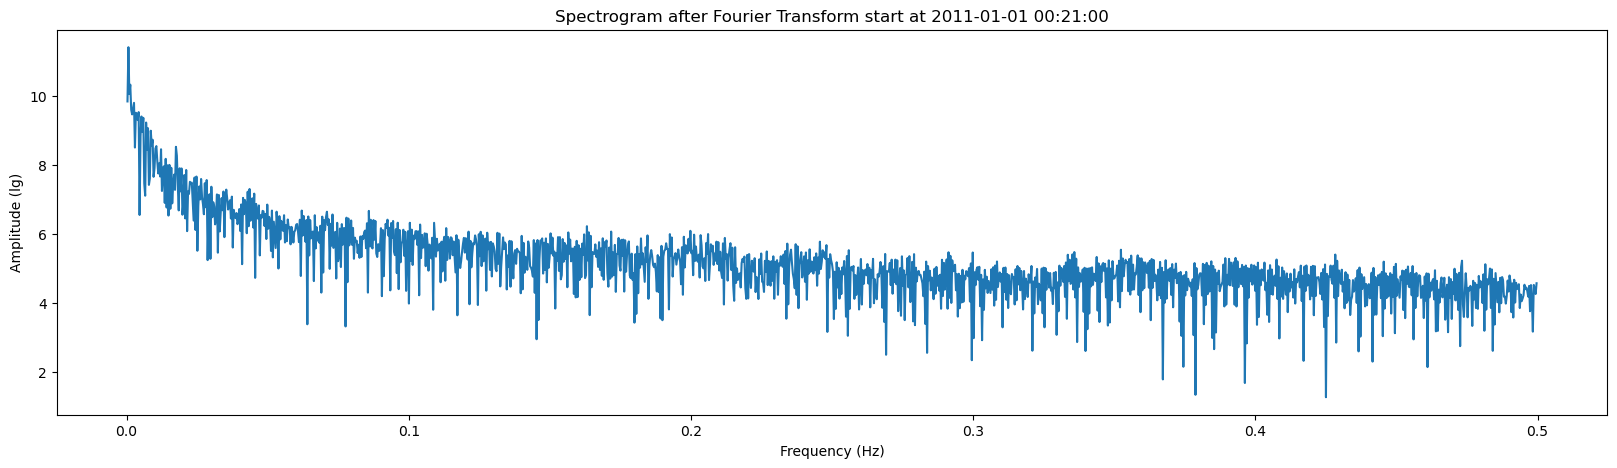

In [6]:
# 带通滤波器
bandpassfilter_vx = libs_cleo.BandPassFilter(data['vx'], data['Epoch'], start_time_for_title=start_time_for_title)
bandpassfilter_diff_bx = libs_cleo.BandPassFilter(data['diff_bx'], data['Epoch'], start_time_for_title=start_time_for_title)

fig1 = bandpassfilter_vx.draw_original_signal()
fig2 = bandpassfilter_diff_bx.draw_original_signal()
fig3 = bandpassfilter_vx.draw_frequency_amplitude(is_log=True)
fig4 = bandpassfilter_diff_bx.draw_frequency_amplitude(is_log=True)

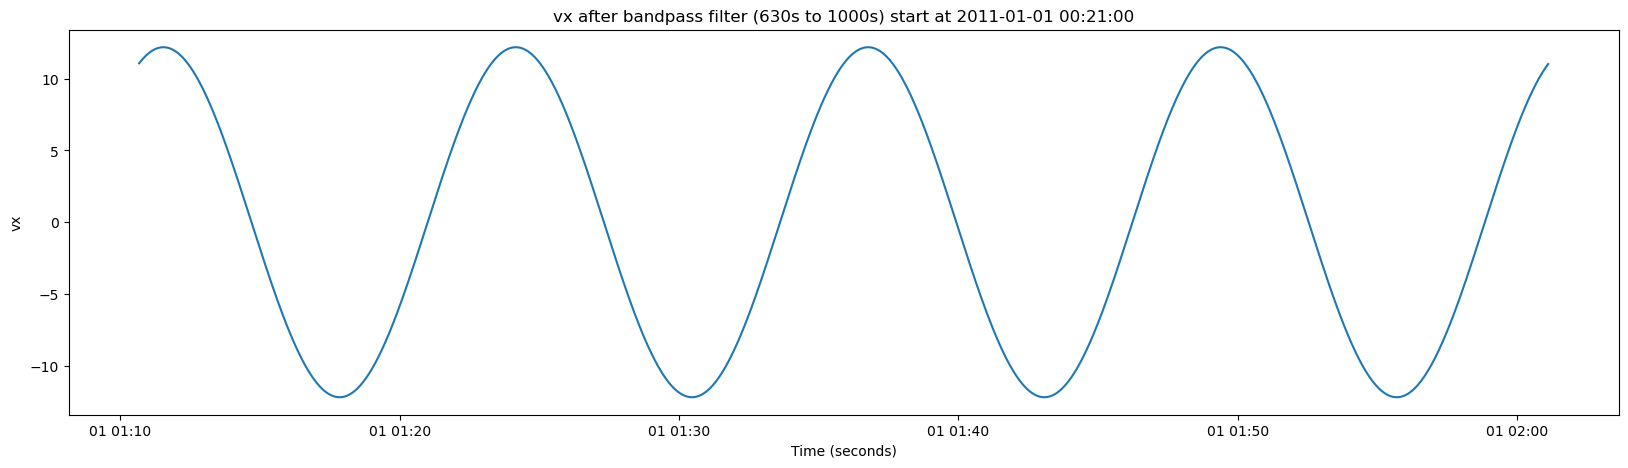

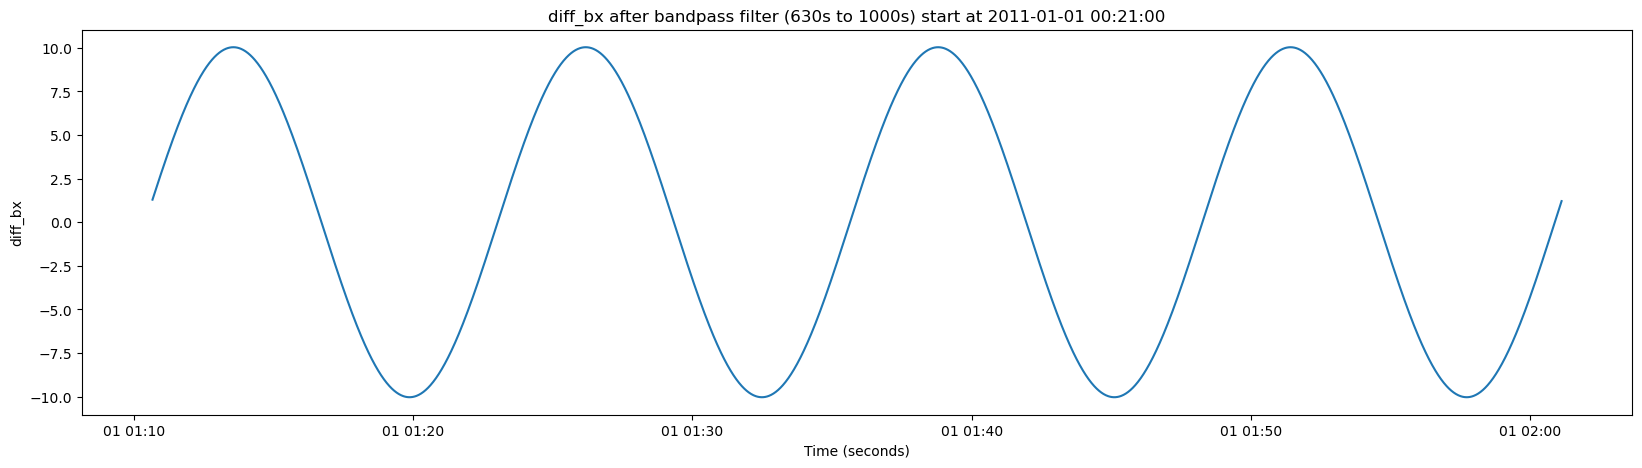

In [7]:
# 设置周期
epoch1 = 630
epoch2 = 1000
fig5,vx_filtered = bandpassfilter_vx.signal_after_bandpass_filter(epoch1=epoch1, epoch2=epoch2, is_draw=True)
fig6,diff_bx_filtered = bandpassfilter_diff_bx.signal_after_bandpass_filter(epoch1=630, epoch2=1000, is_draw=True)

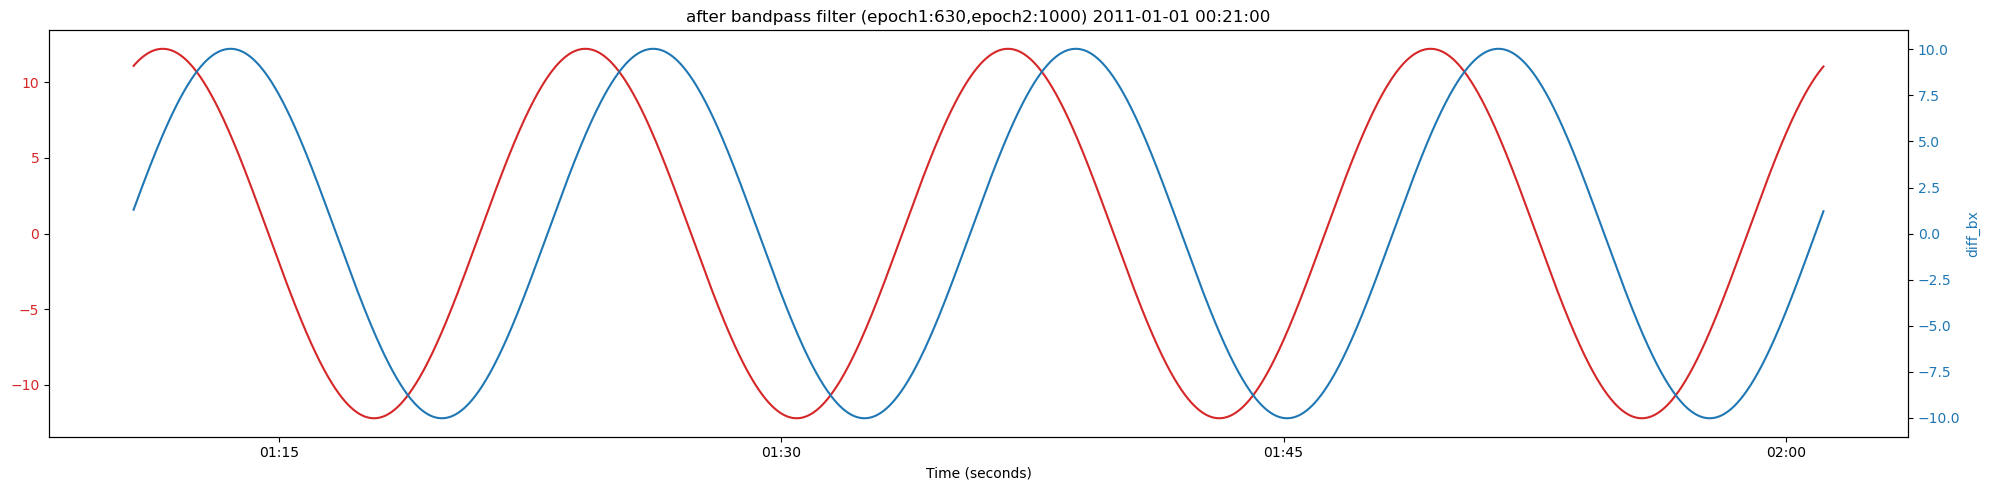

In [8]:
fig,ax = plt.subplots(figsize=(20, 5))
ax.set_title(f"after bandpass filter (epoch1:{epoch1},epoch2:{epoch2}) {start_time_for_title}")
# 绘制第一组数据，使用左侧y轴
color = 'tab:red'
ax.set_xlabel('Time (seconds)')
ax.plot(data['Epoch'], vx_filtered, color=color)
ax.xaxis.set_major_locator(mdates.MinuteLocator(byminute=[0, 15, 30, 45]))  # 只在12点和13点显示
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # 格式化显示格式
ax.tick_params(axis='y', labelcolor=color)

# 创建第二个坐标轴，共享同一个x轴
ax_right = ax.twinx()  
color = 'tab:blue'
ax_right.set_ylabel('diff_bx', color=color)
ax_right.plot(data['Epoch'], diff_bx_filtered, color=color)
ax_right.tick_params(axis='y', labelcolor=color)


# 显示图形
fig.tight_layout()  # 可选，为了更好的布局
# fig.suptitle(f' after bandpass filter (s to s)')
plt.show()